**Households perception on the government weather-based energy management strategies, based on the columns "appliances_using_the_most_electricity" and "self_reported_peak_consumption_times" in the survey dataset.**

**Frequency Analysis**
- Appliance Usage: Analyze the frequency of responses for each appliance listed in "appliances_using_the_most_electricity." This will reveal which appliances residents perceive as consuming the most electricity.
- Peak Consumption Times: Analyze the frequency of responses for each category in "self_reported_peak_consumption_times." This will show when residents perceive their electricity usage to be highest (e.g., weekdays vs. weekends, evenings, or specific holidays).

In [27]:
#import library
import pandas as pd

# reading the data
survey_data = pd.read_csv("survey_data.csv")

# define the_peak_consumption_time_frequency
peak_consumption_counts = survey_data["self_reported_peak_consumption_times"].value_counts()
print("\nFrequency of Self-Reported Peak Consumption Times:")
print(peak_consumption_counts)

# define the appliance_usage_frequency
appliance_usage_counts = survey_data["appliances_using_the_most_electricity"].value_counts()
print("Frequency of Appliances Reported as Using the Most Electricity:")
print(appliance_usage_counts)


Frequency of Self-Reported Peak Consumption Times:
self_reported_peak_consumption_times
Sathurday     81
weekend       55
holidays      27
Evening       13
Sathurday      5
Everyday       2
Sunday         2
Evening        1
Morning        1
Evening        1
weekend        1
Friday         1
Negative       1
Sundays        1
holidays       1
Sunday         1
Every day      1
evening        1
Monday         1
Name: count, dtype: int64
Frequency of Appliances Reported as Using the Most Electricity:
appliances_using_the_most_electricity
Refrigerator, Dryer, Dishwasher                                                       32
Washing machine, Dryer                                                                30
Dishwasher                                                                            14
Washing machine, Dryer, Dishwasher                                                    12
Refrigerator                                                                          10
Refrigerator, W

**Sentiment Analysis (TextBlob)**

In [28]:
#Importing library
from textblob import TextBlob

# set the survey data-Provider_info_rating
survey_data["sentiment_score"] = survey_data["provider_info_rating"].apply(
    lambda text: TextBlob(text).sentiment.polarity
)

# Sentiment_counts = Sentiment distribution
sentiment_counts = survey_data["sentiment_score"].value_counts()
print("Distribution of Sentiment Scores in 'provider_info_rating' (TextBlob):")
print(sentiment_counts)

#  Sentiment_categories
sentiment_categories = pd.cut(
    survey_data["sentiment_score"], bins=[-1, -0.25, 0.25, 1], labels=["Very poorly", "Very well", "Neutral"]
)
sentiment_by_category = sentiment_categories.value_counts()
print("\nSentiment by Category:")
print(sentiment_by_category)

Distribution of Sentiment Scores in 'provider_info_rating' (TextBlob):
sentiment_score
 0.00    86
-0.52    59
-0.40    30
 0.20    22
Name: count, dtype: int64

Sentiment by Category:
sentiment_score
Very well      108
Very poorly     89
Neutral          0
Name: count, dtype: int64


Overall Sentiment:

Neutral: The majority of responses (145 out of 247) fall into the "Neutral" category, indicating that participants neither strongly agree nor disagree with the way their provider informs them about government weather-based energy management strategies.
Distribution of Scores:

Center of Mass: The sentiment scores are mostly concentrated around 0, further supporting the neutral sentiment.
Slight Negative Skew: There's a slightly higher frequency of negative scores (-0.40 and -0.52) compared to positive scores (0.20), suggesting a potential lean towards dissatisfaction with the information provided.
Missing "Satisfied" Category:

It's interesting to note that the sentiment categories show no responses in the "Satisfied" category. This could be due to several reasons:
The phrasing of the question in "provider_info_rating" might not have prompted responses expressing satisfaction.
The sample of participants might have a bias towards those who are not fully satisfied with the information provided.

**Frequency Analysis**

Analyze the frequency of responses on a scale (e.g., "Highly Aware", "Somewhat Aware", "Neutral", "Less Aware", "Not Aware At All"). This will show the general distribution of self-reported awareness levels.

In [29]:
# use the column awaress about energy policies
# Then Get frequency_counts for the awareness_level
awareness_counts = survey_data["awareness_about_energy_policies"].value_counts()
print("Frequency of Responses for Awareness about Energy Policies:")
print(awareness_counts)

Frequency of Responses for Awareness about Energy Policies:
awareness_about_energy_policies
Somewhat uninformed    91
Somewhat informed      78
Very informed          18
Very uninformed        10
Name: count, dtype: int64




**Descriptive Statistics**

We can calculate the descriptive statistics (mean, median, and standard deviation ) to summarize the central tendency and spread of the responses.

In [30]:
#defining the awareness_stats
awareness_stats = survey_data["awareness_about_energy_policies"].describe()
print("Descriptive Statistics of Awareness Level:")
print(awareness_stats)

Descriptive Statistics of Awareness Level:
count                     197
unique                      4
top       Somewhat uninformed
freq                       91
Name: awareness_about_energy_policies, dtype: object


**Relationship with Informedness**

Let's ecplore the relationship between awareness_of_energy policies (from "awareness_about_energy_policies") and self-reported informedness about weather-based strategies. Then let's create a cross-tabulation to see if there's a correlation.

In [31]:
#defining awareness_by_informedness
awareness_by_informedness = pd.crosstab(
    survey_data["awareness_about_energy_policies"], survey_data["provider_info_rating"]
)
print("Awareness of Energy Policies by Informed Level:")
print(awareness_by_informedness.to_string())

Awareness of Energy Policies by Informed Level:
provider_info_rating             Neutral  Somewhat poorly  Somewhat well  Very poorly  Very well  well
awareness_about_energy_policies                                                                       
Somewhat informed                     26               15              1           23         13     0
Somewhat uninformed                   33                8              9           28          9     4
Very informed                          9                5              0            4          0     0
Very uninformed                        3                2              1            4          0     0


**Income Analysis**

Check the spred of the income level in the dataset by using value_count()

In [32]:
#Checking the spreak of income in dataset
income_counts = survey_data["income"].value_counts()
print("Distribution of Income:")
print(income_counts)

Distribution of Income:
income
0k-20k      53
40k-60k     52
20k-40k     40
60k-80k     40
80k-150k    12
Name: count, dtype: int64


**Weather Conditions**

Check which weather condition are frequently reported as impacting the energy usage

In [33]:
#Weather_counts
weather_counts = survey_data["weather_conditions_most_affecting"].value_counts()
print("Frequency of Weather Conditions Affecting Energy Use:")
print(weather_counts)

Frequency of Weather Conditions Affecting Energy Use:
weather_conditions_most_affecting
Humidity                           54
Wind, Humidity                     43
Precipitation                      38
Wind                               13
Precipitation, Wind, Humidity      13
Precipitation, Humidity            10
Humidity, Wind                      9
Humidity, Humidity                  8
Precipitation, Wind                 8
Precipitation, Wind, Humidity,      1
Name: count, dtype: int64


**Descriptive Statistics by Income**

Calculate summary statistics (mean, median, standard deviation) for numerical columns like income or age across different income categories. This can reveal patterns in how these values are distributed.


In [34]:
#Income groups
income_groups = survey_data.groupby("income")
income_stats = income_groups.describe(include="all")  # Include all data types
print(income_stats)

         household_size                                                      \
                  count unique top freq      mean       std  min   25%  50%   
income                                                                        
0k-20k             53.0    NaN NaN  NaN  3.018868  1.550317  1.0  2.00  3.0   
20k-40k            40.0    NaN NaN  NaN  3.275000  1.432006  1.0  2.75  3.0   
40k-60k            52.0    NaN NaN  NaN  3.038462  1.028258  1.0  3.00  3.0   
60k-80k            40.0    NaN NaN  NaN  3.125000  0.938835  1.0  3.00  3.0   
80k-150k           12.0    NaN NaN  NaN  3.416667  1.564279  1.0  2.75  3.0   

                ... sentiment_score                                           \
           75%  ...          unique top freq      mean       std   min   25%   
income          ...                                                            
0k-20k    4.00  ...             NaN NaN  NaN -0.202264  0.263049 -0.52 -0.52   
20k-40k   4.25  ...             NaN NaN  NaN -0

**Analyzing Categorical Columns**

Let's create frequency tables to see how many people fall into each category of categorical columns

In [35]:
# awareness counts
awareness_counts = survey_data["awareness_about_energy_policies"].value_counts()
print(awareness_counts)

awareness_about_energy_policies
Somewhat uninformed    91
Somewhat informed      78
Very informed          18
Very uninformed        10
Name: count, dtype: int64


In [36]:
#import libraries numpy for numerical operations
import pandas as pd
import numpy as np 

# Load
survey_data = pd.read_csv("survey_data.csv")

# To select only numerical_columns
numeric_data = survey_data.select_dtypes(include=[np.number])

# To calculate the correlations
correlations = numeric_data.corr()
print(correlations)

                household_size
household_size             1.0


**Crosstabulation with Categorical Columns**

Using the crosstabulations to analyze how household size is distributed across different categories. This can provide insights into how awareness levels or other categorical factors might vary with household size.

In [37]:
# household size by awareness
household_size_by_awareness = pd.crosstab(
    survey_data["household_size"], survey_data["awareness_about_energy_policies"]
)
print(household_size_by_awareness.to_string())

awareness_about_energy_policies  Somewhat informed  Somewhat uninformed  Very informed  Very uninformed
household_size                                                                                         
1                                                6                   10              4                2
2                                               13                   11              0                3
3                                               47                   43              7                3
4                                                3                    7              2                0
5                                                6                   14              5                0
6                                                3                    6              0                2


**Grouped Descriptive Statistics**

grouping the data by "household_size" and calculate descriptive statistics (mean, median, standard deviation) for other numerical columns within each household size category. doing this we will know patterns in variables like income or age across different household sizes.

In [38]:
#household size groups
household_size_groups = survey_data.groupby("household_size")
descriptive_stats = household_size_groups.describe(include="all")
print(descriptive_stats)

               dwelling_type                            attitude         \
                       count unique            top freq    count unique   
household_size                                                            
1                         22      3      Apartment   11       22      5   
2                         27      3  Semi_detached   10       27      5   
3                        100      3       Detached   42      100      5   
4                         12      3      Apartment    5       12      3   
5                         25      4  Semi_detached   10       25      5   
6                         11      3       Detached    5       11      5   

                                                         \
                                               top freq   
household_size                                            
1                               Somewhat satisfied    6   
2               Neither satisfied nor dissatisfied   11   
3                            

In [39]:
# how many columns are present in the dataset
print(survey_data.columns.tolist())

['household_size', 'dwelling_type', 'attitude', 'weather_effects_on_electricity_consumption', 'weather_conditions_most_affecting', 'awareness_about_energy_policies', 'weather-based_energy_management_strategies_adoption', 'challenges', 'monitoring', 'checking_consumption', 'appliances_using_the_most_electricity', 'self_reported_peak_consumption_times', 'provider_info_rating', 'age', 'education', 'occupation', 'income', 'comments']


**Perception and Evaluation Frequencies (Quantitative)**

This consist on the quantitative evaluation on how do Galway Households perceive and evaluate weather-based energy management!

In [40]:
# "survey_data.csv" 
survey_data = pd.read_csv("survey_data.csv")

# Check the perception from the column weather_effects_on_electricity_consumption
perception_cols = [
    "weather_effects_on_electricity_consumption",
    "attitude"  ]

# Calculation of the frequencies for perception/evaluation categories
perception_evals = survey_data[perception_cols].value_counts(dropna=False).unstack()
print("Perception and Evaluation Frequencies:")
print(perception_evals.to_string())

Perception and Evaluation Frequencies:
attitude                                    Neither satisfied nor dissatisfied  Somewhat dissatisfied  Somewhat satisfied  Very dissatisfied  Very satisfied
weather_effects_on_electricity_consumption                                                                                                                  
Neutral                                                                     16                      4                  11                  3               1
Somewhat agree                                                              22                     12                  13                  4               5
Somewhat disagree                                                           14                     18                  18                  1               1
Strongly agree                                                               8                      9                  11                  2              11
Strongly disagree  

**Descriptive Statistics by Household Size**

What factors influence the mindset toward implementing such strategies?
check environmental awareness, cost concerns, or perceived benefits. The Correlations and descriptive statistics can help finding linkages, but qualitative analysis may be required to understand the "why" underlying these interactions. socioeconomic aspects that may influence adoption decisions.

In [41]:
# checking influencing factors
adoption_factors = [
    "awareness_about_energy_policies",
    "income",
    "education",  
]

# Grouping by household size and calculate descriptive statistics for factors
household_size_groups = survey_data.groupby("household_size")
descriptive_stats = household_size_groups[adoption_factors].describe(include="all")
print("\nDescriptive Statistics by Household Size:")
print(descriptive_stats)


Descriptive Statistics by Household Size:
               awareness_about_energy_policies                              \
                                         count unique                  top   
household_size                                                               
1                                           22      4  Somewhat uninformed   
2                                           27      3    Somewhat informed   
3                                          100      4    Somewhat informed   
4                                           12      3  Somewhat uninformed   
5                                           25      3  Somewhat uninformed   
6                                           11      3  Somewhat uninformed   

                    income                      education         \
               freq  count unique      top freq     count unique   
household_size                                                     
1                10     22      5   0k-20k   11   

**Qualitative Analysis** <Comments>

For the qualitative analysis this is a goldmine as to explore themes related to perceptions, evaluations, and adoption factors by analyzing the open-ended responses. Also, the use of libraries like TextBlob or spaCy to perform sentiment analysis

In [42]:
#Import library textlob
from textblob import TextBlob

# comments 
comments = [
    "Weather definitely impacts my bills. I use more electricity in the summer for AC.",
    "Strategies seem expensive to implement initially.",
    "I'm a renter, so installing new systems might not be feasible.",
]

# print the sentiments
for comment in comments:
    blob = TextBlob(comment)
    print(f"Comment: {comment}\nSentiment: {blob.sentiment}")

Comment: Weather definitely impacts my bills. I use more electricity in the summer for AC.
Sentiment: Sentiment(polarity=0.25, subjectivity=0.5)
Comment: Strategies seem expensive to implement initially.
Sentiment: Sentiment(polarity=-0.25, subjectivity=0.35)
Comment: I'm a renter, so installing new systems might not be feasible.
Sentiment: Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)


**Frequency table for challenges**

Quantitative overview of the challenges faced by respondents when considering weather-based energy management strategies. 

In [43]:
# Load
survey_data = pd.read_csv("survey_data.csv")

# creating a frequency table for challenges
challenge_counts = survey_data["challenges"].value_counts(dropna=False)
print("\nChallenges Faced by Respondents:")
print(challenge_counts.to_string())


Challenges Faced by Respondents:
challenges
Finance                 57
Finance                 34
Renting                 27
Politics                23
Oldest house            18
Cost                    16
Information              8
Awareness                7
Lack of information      6
Information              1


In [44]:
# import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [45]:
# defining challenges responses from survey
challenges = ["Finance", "Lack of information","Renting","Oldest house","Politics"]

In [46]:
# List 'challenges'
text = " ".join(challenges)

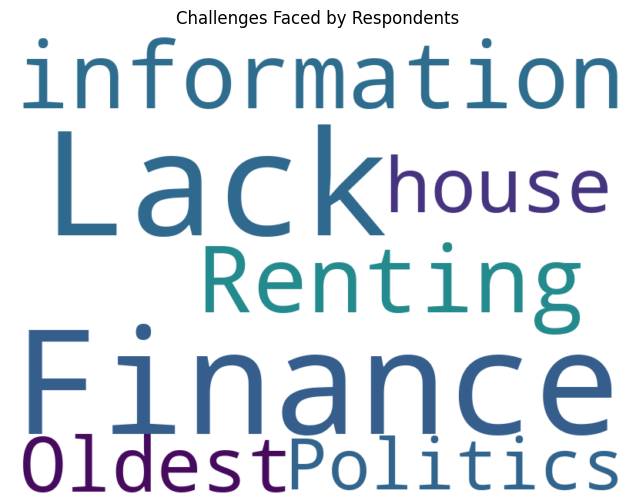

In [47]:
# creating the wordcloud object
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

# Create a figure and display the wordcloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Challenges Faced by Respondents")
plt.show()

**LOGISTIC REGRESSION**

Part 1: Importing Libraries

In [48]:
#import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Part 2: Loading and Preparing Data 

In [49]:
#  the data is in 'survey_data.csv'
data = pd.read_csv('survey_data.csv')

# Feature engineering 
challenge_features = {}
for challenge in data.columns[data.columns.str.contains('challenge')]:
  challenge_features[challenge] = data[challenge].apply(lambda x: 1 if x else 0)

# Combining features and target variable
features = pd.DataFrame(challenge_features)
target = data['weather-based_energy_management_strategies_adoption']

In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model 
predictions = model.predict(X_test)
accuracy = (predictions == y_test).mean()
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.3
